In [511]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [523]:
df = pd.read_csv('Walmart_Store_sales.csv')

In [524]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [525]:
df.tail (20)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6415,45,15-06-2012,821498.18,0,71.93,3.620,191.029973,8.567
6416,45,22-06-2012,822569.16,0,74.22,3.564,191.064610,8.567
6417,45,29-06-2012,773367.71,0,75.22,3.506,191.099246,8.567
6418,45,06-07-2012,843361.10,0,82.99,3.475,191.133883,8.684
6419,45,13-07-2012,749817.08,0,79.97,3.523,191.168519,8.684
6420,45,20-07-2012,737613.65,0,78.89,3.567,191.167043,8.684
6421,45,27-07-2012,711671.58,0,77.20,3.647,191.165566,8.684
6422,45,03-08-2012,725729.51,0,76.58,3.654,191.164090,8.684
6423,45,10-08-2012,733037.32,0,78.65,3.722,191.162613,8.684
6424,45,17-08-2012,722496.93,0,75.71,3.807,191.228492,8.684


In [570]:
infer_datetime_format=True
#df['Date'] =  pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Day           6435 non-null   int64         
 9   Week          6435 non-null   int64         
 10  Month         6435 non-null   int64         
 11  Year          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 603.4 KB


In [571]:
df["Day"]= pd.DatetimeIndex(df['Date']).day
df["Week"]= pd.DatetimeIndex(df['Date']).week
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df
#

C:\Users\ASUS1\AppData\Local\Temp\ipykernel_13388\1448501066.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df["Week"]= pd.DatetimeIndex(df['Date']).week


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Week,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,17,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,48,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,7,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,8,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,18,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,39,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,19,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,50,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,42,10,2012


# Análisis exploratorio

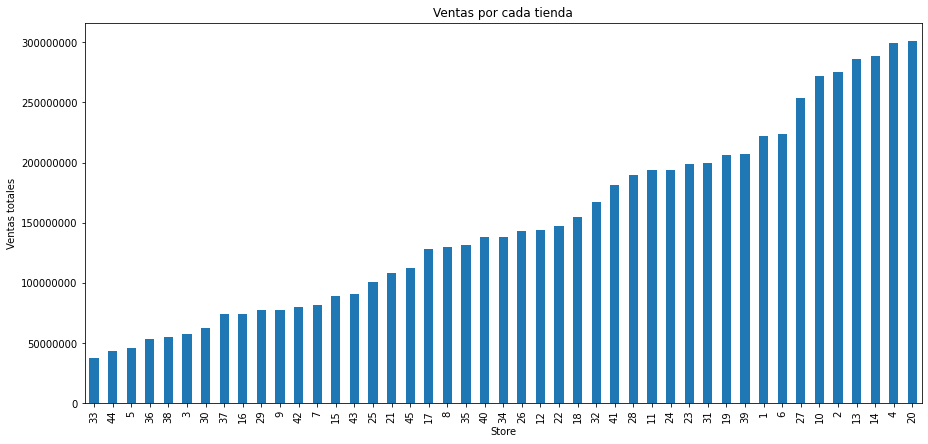

In [572]:
total_sales= df.groupby('Store')['Weekly_Sales'].sum().sort_values() 
plt.figure(figsize=(15,7))
plt.ticklabel_format( style='plain', axis='y')
plt.title('Ventas por cada tienda')
plt.xlabel('Tienda')
plt.ylabel('Ventas totales')
total_sales.plot(kind='bar');
# tienda con el maximo de ventas suma de las ventas semanales por tienda. Tienda X, Ventas Y

In [577]:
df_std = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))
df_std.head(1).index[0] , df_std.head(1).Weekly_Sales[df_std.head(1).index[0]] 
# tienda con más desviacion estandar. Se agrupo por tienda, se obtuvo la desviacion

(14, 317569.9494755081)

In [578]:
coef = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].std() / df.groupby('Store')['Weekly_Sales'].mean()*100)
coef.head
# Coeficiente de desviación medio

<bound method NDFrame.head of        Weekly_Sales
Store              
1         10.029212
2         12.342388
3         11.502141
4         12.708254
5         11.866844
6         13.582286
7         19.730469
8         11.695283
9         12.689547
10        15.913349
11        12.226183
12        13.792532
13        13.251363
14        15.713674
15        19.338399
16        16.518065
17        12.552067
18        16.284550
19        13.268012
20        13.090269
21        17.029239
22        15.678288
23        17.972115
24        12.363738
25        15.986040
26        11.011066
27        13.515544
28        13.732974
29        18.374247
30         5.200804
31         9.016105
32        11.831049
33         9.286835
34        10.822524
35        22.968111
36        16.257891
37         4.208412
38        11.087545
39        14.990779
40        12.342978
41        14.817711
42         9.033533
43         6.410363
44         8.179331
45        16.561273>

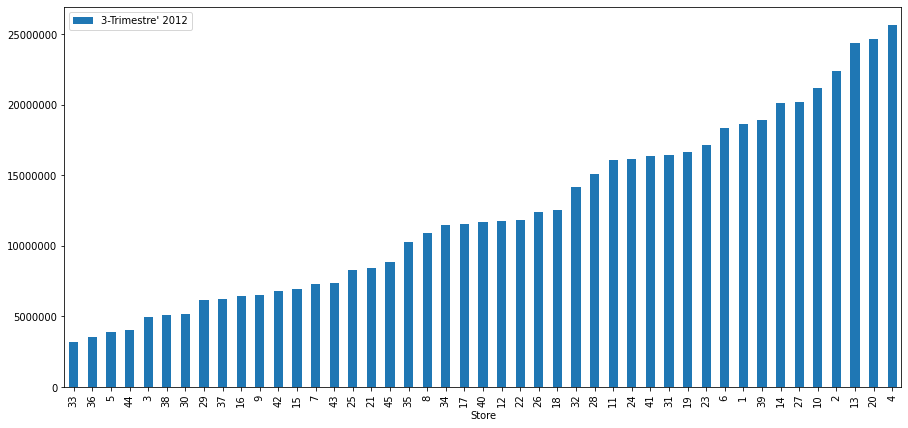

In [579]:
tercer_trimestre= df[(df['Date'] >= '2012-07-01') & (df['Date'] <= '2012-09-30')].groupby('Store')['Weekly_Sales'].sum().sort_values()
plt.figure(figsize=(15,7))
tercer_trimestre.plot(kind='bar',legend=True)
plt.ticklabel_format( style='plain', axis='y')
plt.legend(["3-Trimestre' 2012"]);
#Crecimiento tercer trimestre 2012 por tienda

In [533]:
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Día_del_trabajo =  ['10-9-2010', '9-9-2011', '7-9-2012']
Acción_de_gracias =  ['26-11-2010', '25-11-2011', '23-11-2012']
Navidad = ['31-12-2010', '30-12-2011', '28-12-2012']
#Definir días festivos

In [581]:
infer_datetime_format=True 
Ventas_Super_Bowl= (pd.DataFrame(df.loc[df.Date.isin(Super_Bowl)]))['Weekly_Sales'].mean()
Ventas_Día_del_trabajo = (pd.DataFrame(df.loc[df.Date.isin(Día_del_trabajo)]))['Weekly_Sales'].mean()
Ventas_Acción_de_gracias = (pd.DataFrame(df.loc[df.Date.isin(Acción_de_gracias)]))['Weekly_Sales'].mean()
Ventas_Navidad = (pd.DataFrame(df.loc[df.Date.isin(Navidad)]))['Weekly_Sales'].mean()
Ventas_Super_Bowl,Ventas_Día_del_trabajo,Ventas_Acción_de_gracias,Ventas_Navidad

#Medias de ventas en días festivos

(1079127.9877037038, 1042427.293925926, 1471273.427777778, 960833.1115555555)

In [582]:
Ventas_no_festivos = df[df['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean()
Ventas_no_festivos
# Medias en días no festivos

1041256.3802088555

In [583]:
Promedio_ventas = {'Ventas_Super_Bowl' : Ventas_Super_Bowl,
              'Ventas_Día_del_trabajo': Ventas_Día_del_trabajo,
              'Ventas_Acción_de_gracias':Ventas_Acción_de_gracias,
              'Ventas_Navidad': Ventas_Navidad,
              'Ventas_no_festivos': Ventas_no_festivos}
Promedio_ventas 

{'Ventas_Super_Bowl': 1079127.9877037038,
 'Ventas_Día_del_trabajo': 1042427.293925926,
 'Ventas_Acción_de_gracias': 1471273.427777778,
 'Ventas_Navidad': 960833.1115555555,
 'Ventas_no_festivos': 1041256.3802088555}

In [585]:
df["Year"].unique()
#ventas en a;os

array([2010, 2011, 2012], dtype=int64)

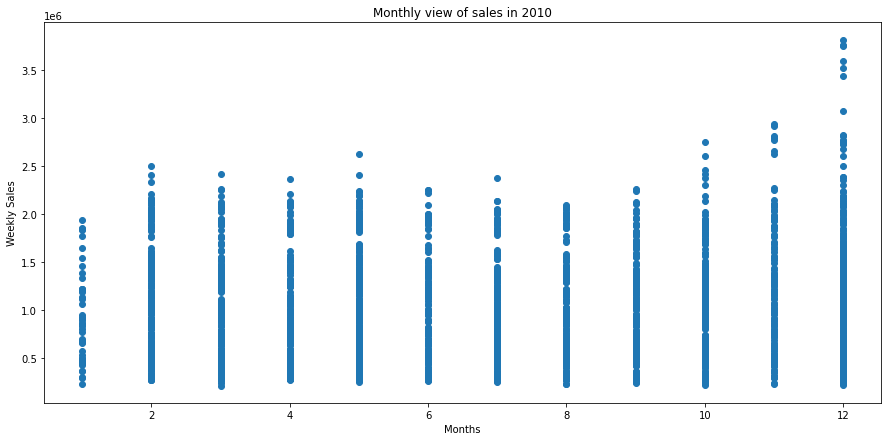

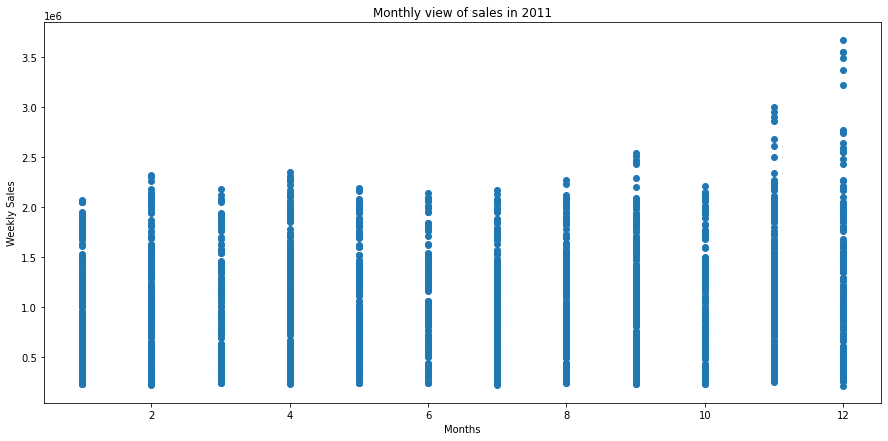

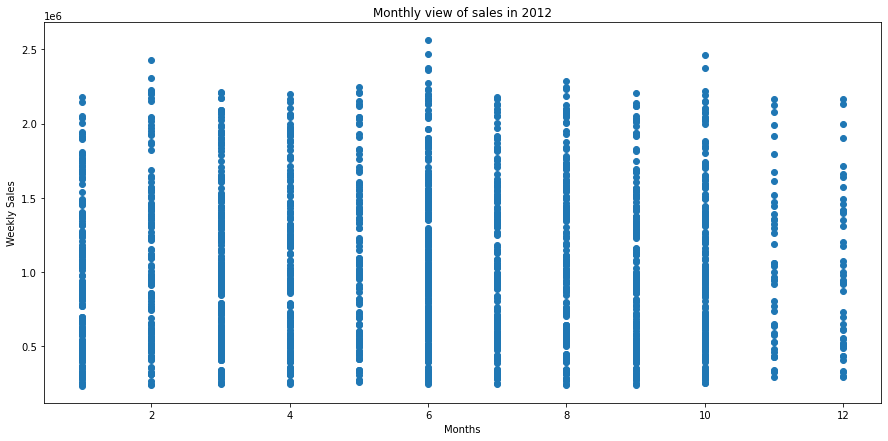

In [586]:

plt.figure(figsize=(15,7))
plt.scatter(df[df.Year==2010]["Month"],df[df.Year==2010]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(df[df.Year==2011]["Month"],df[df.Year==2011]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(df[df.Year==2012]["Month"],df[df.Year==2012]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")
plt.show()
# Ventas mensuales por año 

<AxesSubplot:xlabel='Month'>

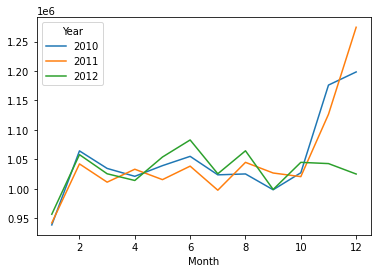

In [587]:
ventas_mensuales = pd.pivot_table(df, values = "Weekly_Sales", columns = "Year", index = "Month")
ventas_mensuales.plot()

# Quitar valores fuera de rango


C:\Users\ASUS1\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS1\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS1\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

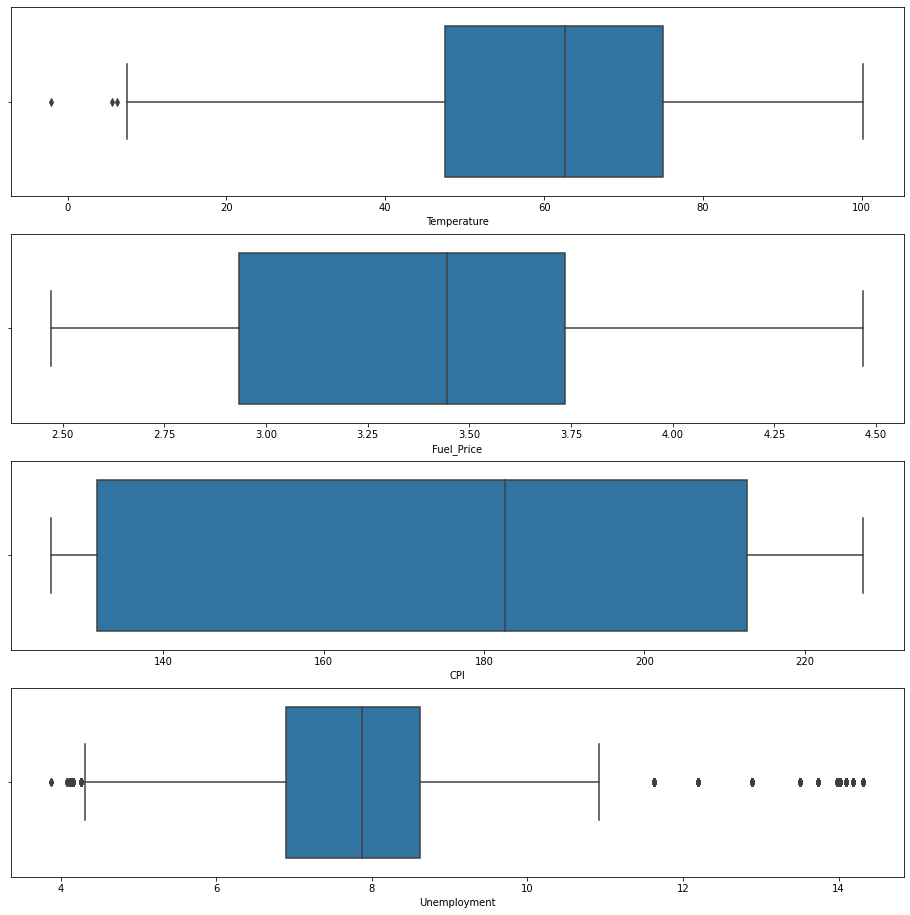

In [588]:
fig, axis = plt.subplots(4,figsize=(16,16))
X = df[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(df[column],ax=axis[i])
# Checamos valores atipicos   

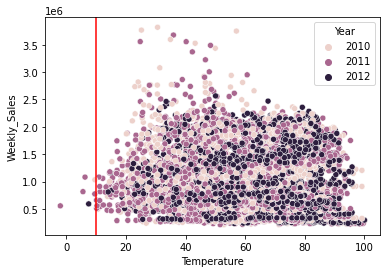

In [599]:
sns.scatterplot(data=df,x='Temperature', y='Weekly_Sales', hue = 'Year')
plt.axvline(x=10,color='r')

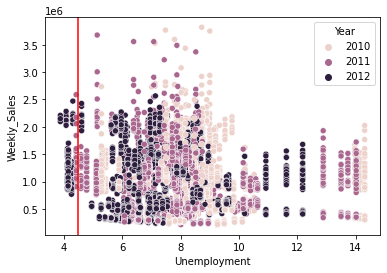

In [600]:
sns.scatterplot(data=df,x='Unemployment', y='Weekly_Sales', hue = 'Year')
plt.axvline(x=4.5,color='r')

In [591]:
df_limpia = df[(df['Unemployment']<10) & (df['Unemployment']>4.5) & (df['Temperature']>10)]
# Quitamos valores atipicos en una nueva función

C:\Users\ASUS1\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS1\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ASUS1\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

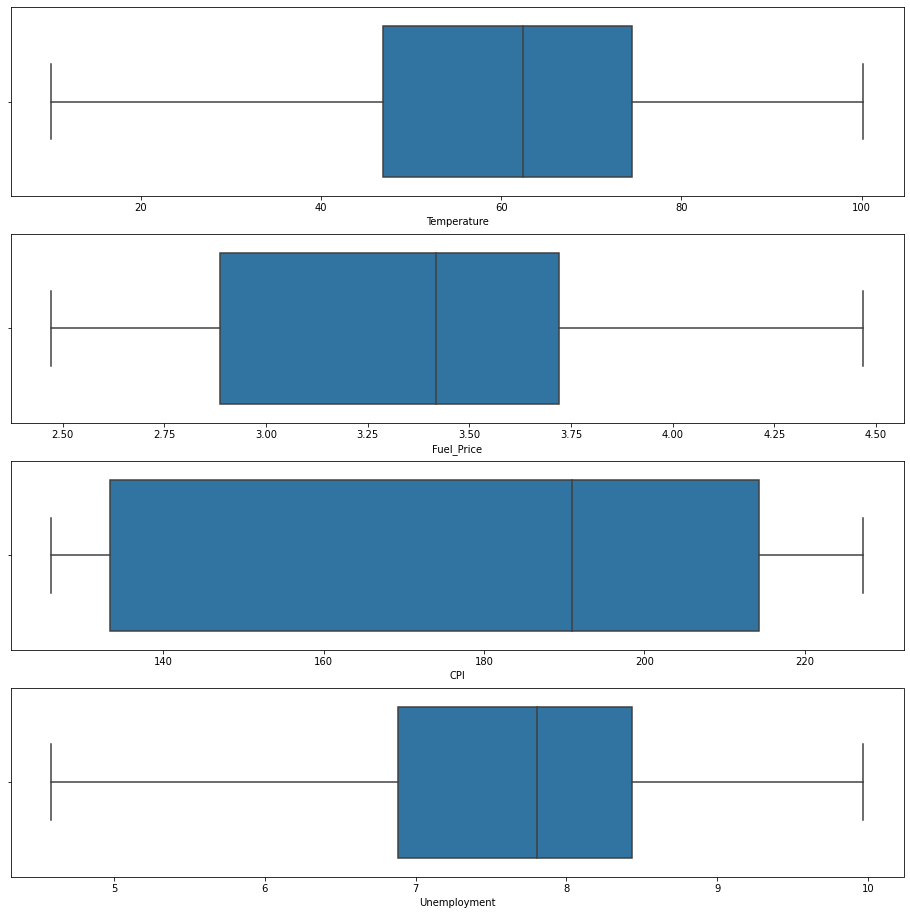

In [592]:
fig, axis = plt.subplots(4,figsize=(16,16))
X = df_limpia[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(df_limpia[column],ax=axis[i])
# Verificamos ya no tener valores atipicos

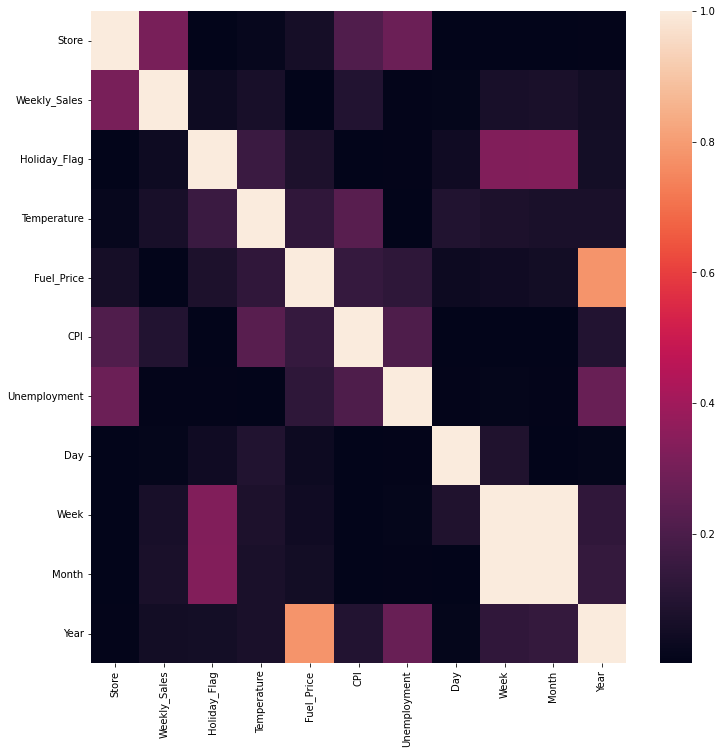

In [593]:
plt.figure(figsize = (12,12))
sns.heatmap(df_limpia.corr().abs())    # To see the correlations
plt.show()

# Modelos


In [594]:
from pmdarima import auto_arima

In [595]:
df_arima=df
df_arima=df_arima.set_index('Date')

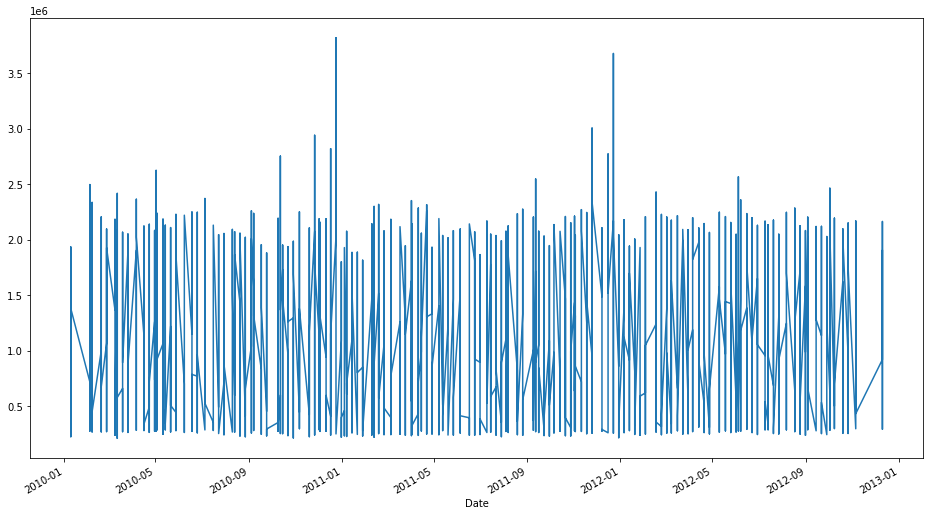

In [596]:
plt.figure(figsize=(16,9))
df_arima['Weekly_Sales'].plot()
plt.show()

In [559]:
df_arimamonth = df_arima.resample('M').mean()

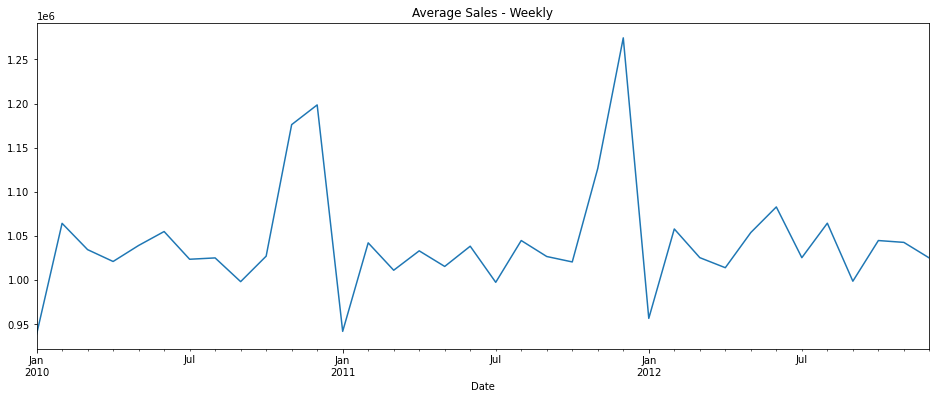

In [560]:
plt.figure(figsize=(16,6))
df_arimamonth['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

In [561]:
train_data = df_arimamonth[:int(0.7*(len(df_arimamonth)))] 
test_data = df_arimamonth[int(0.7*(len(df_arimamonth))):]

print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (25, 11)
Test: (11, 11)


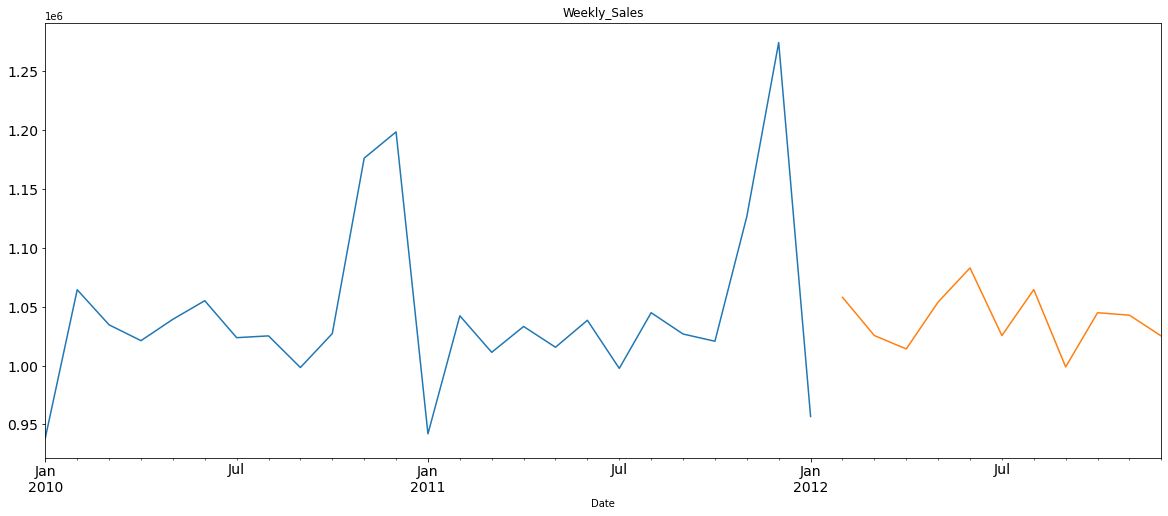

In [562]:
train_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

In [563]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff (df_arimamonth['Weekly_Sales'])

(0.06962834103894053, True)

In [564]:
model_auto_arima = auto_arima(train_data['Weekly_Sales'], trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=0, max_D=0,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data['Weekly_Sales'])

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=636.012, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=638.061, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=638.990, Time=0.03 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=640.674, Time=0.06 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=643.154, Time=0.06 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=638.042, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=639.842, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=641.974, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=637.959, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=640.130, Time=0.09 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=642.772, Time=0.13 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=641.711, Time=0.23 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   :

ARIMA(maxiter=200, order=(0, 0, 0), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

In [565]:
model_auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   25
Model:                        SARIMAX   Log Likelihood                -316.006
Date:                Wed, 19 Oct 2022   AIC                            636.012
Time:                        13:14:45   BIC                            638.450
Sample:                    01-31-2010   HQIC                           636.688
                         - 01-31-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.045e+06   2.13e+04     48.969      0.000       1e+06    1.09e+06
sigma2      5.581e+09   1.58e+09      3.534      0.000    2.49e+09    8.68e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                13.17
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               5.22   Skew:                             1.44
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

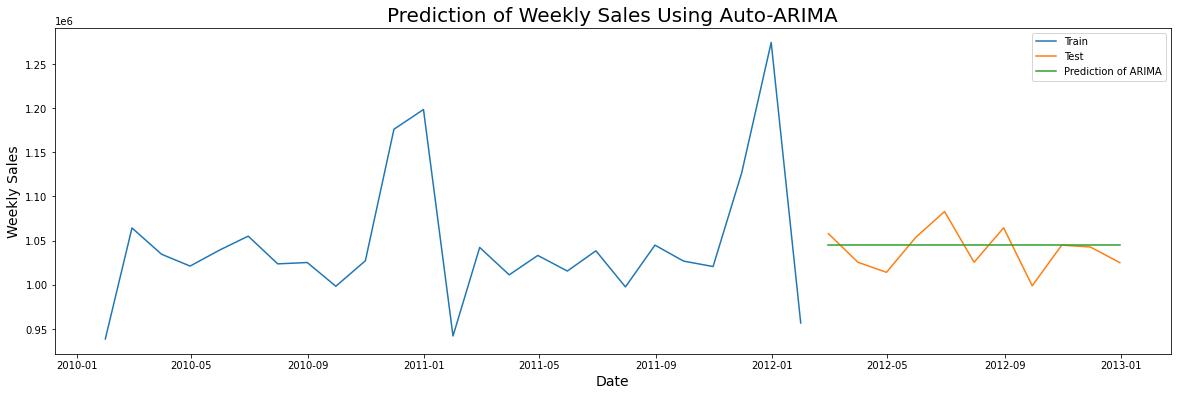

In [566]:
y_pred = model_auto_arima.predict(n_periods=len(test_data['Weekly_Sales']))
y_pred = pd.DataFrame(y_pred,index = test_data['Weekly_Sales'].index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data['Weekly_Sales'], label='Train')
plt.plot(test_data['Weekly_Sales'], label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

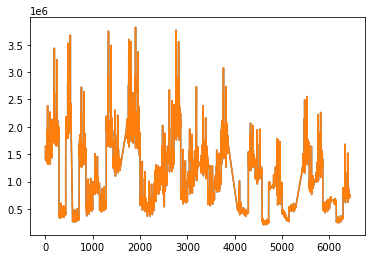

In [347]:
train = df_limpia['Weekly_Sales']
test = df_limpia['Weekly_Sales']
plt.plot(train)
plt.plot(test)
#plt.plot(test)

<AxesSubplot:>

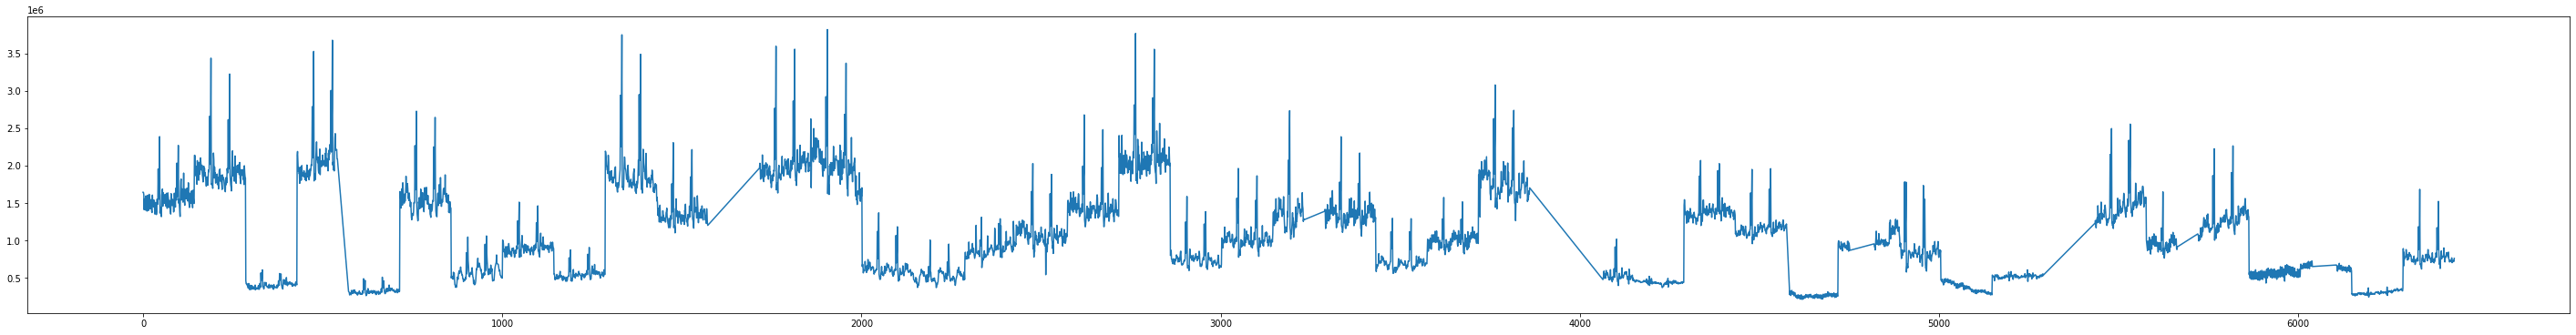

In [370]:
plt.figure(figsize=(50,6))
df_limpia['Weekly_Sales'].plot()

In [ ]:
model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

In [83]:
X = df_limpia[['Store','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
y = df_limpia['Weekly_Sales']


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [85]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [86]:
model.coef_

array([-15692.76405654,  84212.21891907,  -1950.82471703,  28788.4485204 ,
        -1009.5326168 ,  11266.82933602, -41133.70881987])

In [87]:
X.mean()

Store             22.268293
Fuel_Price         3.337920
CPI              176.309343
Unemployment       7.623162
Day               15.641216
Month              6.462001
Year            2010.957229
dtype: float64

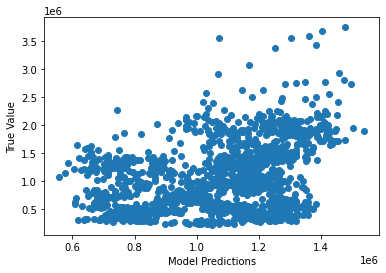

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(model.predict(X_test),y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')

plt.show()

In [89]:
from scipy.stats import pearsonr

pearsonr(model.predict(X_test),y_test)

(0.34971583602335654, 5.682144877254809e-42)

In [90]:
from sklearn import metrics


In [91]:
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared:',metrics.r2_score(y_test, y_pred))



Linear Regression:

Accuracy: 13.140654991271584
Mean Absolute Error: 461098.1225667132
Mean Squared Error: 314337577087.61597
Root Mean Squared Error: 560658.164203123
R Squared: 0.12204295822113276


In [92]:
from sklearn.ensemble import RandomForestRegressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor()        
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared:',metrics.r2_score(y_test, y_pred))

Random Forest Regressor:

Accuracy: 94.62017941184791
Mean Absolute Error: 71722.15943342754
Mean Squared Error: 19261532038.28093
Root Mean Squared Error: 138785.92161412098
R Squared: 0.9462017941184792


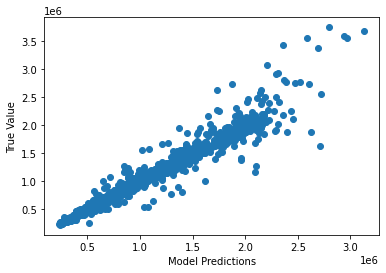

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_pred,y_test)
plt.xlabel('Model Predictions')
plt.ylabel('True Value')

plt.show()

In [94]:
pearsonr(y_pred,y_test)

(0.9727614682480372, 0.0)